In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

In [ ]:
# Constant values
Delta_t = 0.1  
Deg2Rad = math.pi/180

# Forward & Inverse kinematic of a differential drive robot

In [ ]:

# Just used in forward calculations
def calculate_local(r, two_l, phi1_dot, phi2_dot): # phi1_dot and phi2_dot are in degree/s
  x_dot_R = (r/2) * (phi1_dot + phi2_dot) * Deg2Rad
  y_dot_R = 0
  teta_dot_R = (r/two_l)* (phi1_dot - phi2_dot) * Deg2Rad
  return np.array([x_dot_R, y_dot_R, teta_dot_R])

#Test
unit_test = calculate_local(2.5, 20, -5, 7)
print(unit_test) # real answer with changing to radian
print("x_dot_R : ", unit_test[0]/Deg2Rad) # not changed to radian 
print("y_dot_R : ", unit_test[1])
print("teta_dot : ", unit_test[2]/Deg2Rad) # deg/s

[ 0.04363323  0.         -0.02617994]
x_dot_R :  2.5
y_dot_R :  0.0
teta_dot :  -1.5


In [ ]:
# shared function between forward and inverse calculation
def change_coordinates(matrix, teta, toGlobal): # teta is in degree
  toGlobal = -1 if toGlobal else 1
  teta *= Deg2Rad
  R_teta = np.array([
    [math.cos(toGlobal * teta), math.sin(toGlobal * teta), 0],
    [-1 * math.sin(toGlobal * teta), math.cos(toGlobal * teta), 0 ],
    [0, 0, 1]
  ])
  return np.dot(R_teta, matrix)

In [ ]:
# Just used in inverse calculations
def calculate_velocity(matrix, r, two_l): 
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')
  eq1 = Eq(matrix[0], (r/2)*(phi1_dot+phi2_dot))
  eq2 = Eq(matrix[2]*Deg2Rad, (r/two_l)*(phi1_dot-phi2_dot))
  sol = solve((eq1, eq2),(phi1_dot, phi2_dot))
  return sol # phi1_dot and phi2_dot are in radian/s

# Test
calculate_velocity([1.41, 0, 1], 2.5, 20)

{phi1_dot: 0.633813170079773, phi2_dot: 0.494186829920227}

In [ ]:
# Main part calculation of forward kinematic
def forward_cal(r, two_l, phi1_dot, phi2_dot, teta):
  return change_coordinates(calculate_local(r, two_l, phi1_dot, phi2_dot), teta, True)

#Test
print("------ Forward test ------")
unit_test = forward_cal(2.5, 20, -5, 7, 30)
print(np.around(unit_test, decimals=2)) # real answer with changing to radian
print("x_dot_I : ", np.around(unit_test[0]/Deg2Rad, decimals=2)) # not changed to radian 
print("y_dot_I : ", np.around(unit_test[1]/Deg2Rad, decimals=2)) # not changed to radian 
print("teta_dot : ", np.around(unit_test[2]/Deg2Rad, decimals=2)) # deg/s

------ Forward test ------
[ 0.04  0.02 -0.03]
x_dot_I :  2.17
y_dot_I :  1.25
teta_dot :  -1.5


In [ ]:
# Main part calculation of inverse kinematic
def inverse_cal(matrix, teta, r, two_l):
  return calculate_velocity(change_coordinates(matrix, teta, False), r, two_l)

print("------ Inverse test ------")
unit_test = inverse_cal([1, 1, 1], 45, 2.5, 20)
print(unit_test) # radian/s

------ Inverse test ------
{phi1_dot: 0.635498595029009, phi2_dot: 0.495872254869463}


# Plots

In [ ]:
def forward_plot(x, y, linear_v, angular_v, t_range):
  # evenly sampled time at 1sec intervals
  t = np.arange(0., t_range, 1)
  
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  
  ax1.plot(t, x) #blue
  ax1.plot(t, y) #orange
  ax1.set_xlabel('t', fontsize=12)
  ax1.set_ylabel('x/y', fontsize=12)

  # the robot's movement path
  plt.tight_layout(3) # set specified padding between plots
  ax2.plot(x, y, 'o') 
  ax2.set_xlabel('x', fontsize=12)
  ax2.set_ylabel('y', fontsize=12)

  # linear velocity diagram
  plt.tight_layout(3)
  ax3.plot(t, linear_v)
  ax3.set_xlabel('t', fontsize=12)
  ax3.set_ylabel('v', fontsize=12)

  # angular velocity diagram
  plt.tight_layout(3)
  ax4.plot(t, angular_v)
  ax4.set_xlabel('t', fontsize=12)
  ax4.set_ylabel('teta_dot', fontsize=12)

In [ ]:
# Final result when the robot perform the movements
def forward_res(r, two_l, phi1, phi2, teta):
  t_range = 10000
  x0 = 5
  y0 = 5

  v = forward_cal(r, two_l, phi1, phi2, teta)

  linear_v = []
  linear_v.append(v[0])

  angular_v = []
  angular_v.append(v[2])

  x = []
  x.append(x0)

  y = []
  y.append(y0)

  v_local = change_coordinates(v, teta, False) # to find the velocities in robot's coordinate
  linear_v = [v_local[0]] * t_range
  angular_v = [v_local[2]] * t_range
  

  for i in range(1, t_range): 
    x.append(x[i-1]+(Delta_t*v[0]))
    y.append(y[i-1]+(Delta_t*v[1]))
    teta += v[2]*Delta_t
    v = forward_cal(r, two_l, phi1, phi2, teta)
    # linear_v.append(v_local[0])                   
    # angular_v.append(v_local[2])

  forward_plot(x, y, linear_v, angular_v, t_range)

## Tests for forward kinematic

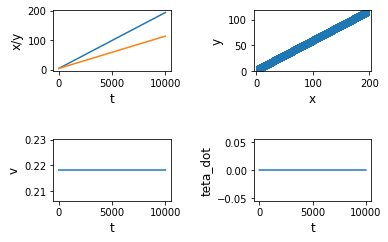

In [ ]:
# Equal and same direction angular velocity for both wheels
# test1 = forward_cal(2.5, 20, 5, 5, 30)
# print("x_dot_I : ", np.around(test1[0], decimals=2)) # radian 
# print("y_dot_I : ", np.around(test1[1], decimals=2)) # radian 
# print("teta_dot : ", np.around(test1[2]/Deg2Rad, decimals=2)) # deg/s
forward_res(2.5, 20, 5, 5, 30)

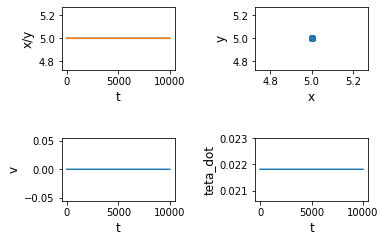

In [ ]:
# Equal angular velocity for both wheels and different directions
# test2 = forward_cal(2.5, 20, 5, -5, 30)
# print("x_dot_I : ", np.around(test2[0], decimals=2)) # radian 
# print("y_dot_I : ", np.around(test2[1], decimals=2)) # radian 
# print("teta_dot : ", np.around(test2[2]/Deg2Rad, decimals=2)) # deg/s
forward_res(2.5, 20, 5, -5, 30)

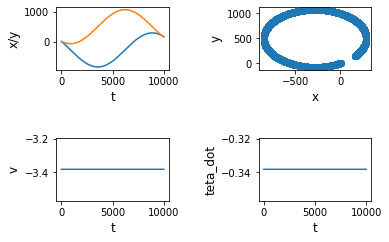

In [ ]:
# Zero angular velocity for one wheel and non-zero for the other
forward_res(2.5, 20, -155, 0, 30)

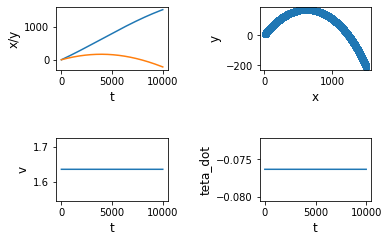

In [ ]:
# Larger angular velocity for one wheel than the other
forward_res(2.5, 20, 20, 55, 30)

## Tests for inverse kinematic

In [ ]:
def inversePlot(v): # v is a dictionary and the solution of equation
  t_range = 10000
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')

  # evenly sampled time at 1sec intervals
  t = np.arange(0., t_range, 1)
  

  angular_v_wheel1 = [v[phi1_dot]] * t_range
  angular_v_wheel2 = [v[phi2_dot]] * t_range
  
  # phi1_dot/phi2_dot and time diagram
  plt.plot(t, angular_v_wheel1) #blue
  plt.plot(t, angular_v_wheel2) #orange
  plt.xlabel('t', fontsize=12)
  plt.ylabel('phi1_dot/phi2_dot', fontsize=12)

{phi1_dot: 0.0878179306876172, phi2_dot: 0.0878179306876172}
Desired result:  0.08726646259971647 rad/s , 0.08726646259971647 rad/s


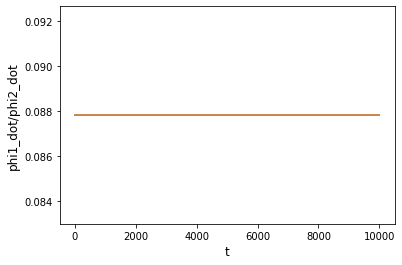

In [ ]:
# Linear movement with constant velocity to the straight forward
# this test is the inverse of test1: the result should be 5 & 5 deg/s
test5 = inverse_cal([0.19, 0.11, 0], 30, 2.5, 20)
print(test5) # output is in radian/s
print("Desired result: ", 5*Deg2Rad, "rad/s ,",5*Deg2Rad, "rad/s") # print 5 in radian/s
inversePlot(test5)

{phi1_dot: 0.0872664625997164, phi2_dot: -0.0872664625997164}
Desired result:  0.08726646259971647 rad/s , -0.08726646259971647 rad/s


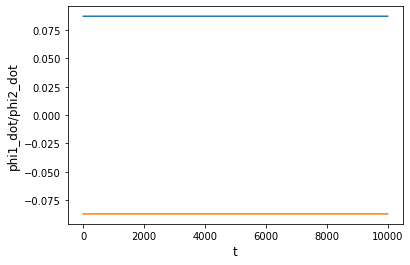

In [ ]:
# Circular in-place movement (without changing position)
# this test is the inverse of test2: the result should be 5 & -5 deg/s
test6 = inverse_cal([0, 0, 1.25], 30, 2.5, 20)
print(test6) # output is in radian/s
print("Desired result: ", 5*Deg2Rad, "rad/s ,",-5*Deg2Rad, "rad/s") # print 5 in radian/s
inversePlot(test6)

# Control

In [ ]:
def velocity_cal(x_i, y_i, x_f, y_f, teta): # teta is in deg
  teta *= Deg2Rad # teta in radian
  p = math.sqrt(math.pow(x_f - x_i, 2) + math.pow(y_f - y_i, 2)) # ro
  # a = -1 * teta + math.atan(np.inf) if (abs(x_f - x_i) == 0) else (-1 * teta + math.atan(abs(y_f - y_i)/abs(x_f - x_i))) # alpha
  a = -1 * teta + math.atan2((y_f - y_i), (x_f - x_i))
  b = -1 * teta - a # beta

  k_p = 0.5   # k_p > 0
  k_b = -1000 # k_b < 0
  k_a = 3000  # k_a > k_p

  v = k_p * p            # linear velocity
  w = k_a * a + k_b * b  # angular velocity

  return [v, 0, w]


In [ ]:
def controller(x_i, y_i, x_f, y_f, teta, r, two_l, x_list, y_list):

  # print(x_i, y_i)
  # print(teta)
  x_list.append(x_i)
  y_list.append(y_i)

  if (abs(x_i - x_f) < 1) and (abs(y_i - y_f) < 1):
    #  and (abs(teta) < 10)    
    # the robot's movement path
    plt.plot(x_list, y_list, 'o') 
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    return

  matrix = velocity_cal(x_i, y_i, x_f, y_f, teta)
  matrix = change_coordinates(matrix, teta, True)

  # Call Inverse kinematic
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')
  phi_dots = inverse_cal(matrix, teta, r, two_l) # radian/s
  phi1_dot = phi_dots[phi1_dot]/Deg2Rad  # degree/s
  phi2_dot = phi_dots[phi2_dot]/Deg2Rad # degree/s

  # Call Forward kinematic
  matrix2 = forward_cal(r, two_l, phi1_dot, phi2_dot, teta) # x_dot, y_dot, teta_dot
  x_i += Delta_t * matrix2[0]
  y_i += Delta_t * matrix2[1]
  teta += Delta_t * matrix2[2]

  controller(x_i, y_i, x_f, y_f, teta, r, two_l, x_list, y_list)

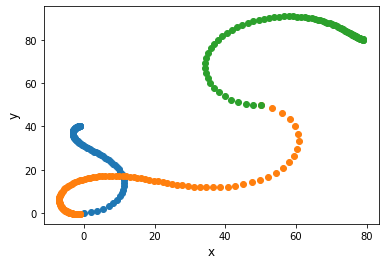

In [ ]:
# Test part 3
controller(0, 0, 0, 40, 10, 2.5, 20, [], [])
controller(50, 50, 0, 0, -25, 2.5, 20, [], [])
controller(50, 50, 80, 80, 180, 2.5, 20, [], [])

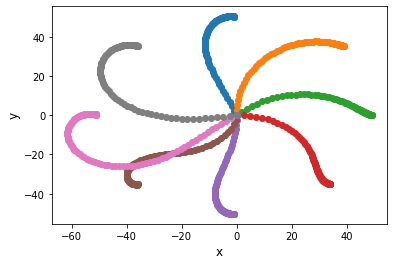

In [ ]:
# Test: Starting point in the middle and different destinations
controller(0, 0, 0, 50, 110, 2.5, 20, [], [])
controller(0, 0, 40, 35, 90, 2.5, 20, [], [])
controller(0, 0, 50, 0, 45, 2.5, 20, [], [])
controller(0, 0, 35, -35, 0, 2.5, 20, [], [])
controller(0, 0, 0, -50, -90, 2.5, 20, [], [])
controller(0, 0, -35, -35, -100, 2.5, 20, [], [])
controller(0, 0, -50, 0, 215, 2.5, 20, [], [])
controller(0, 0, -35, 35, 190, 2.5, 20, [], [])


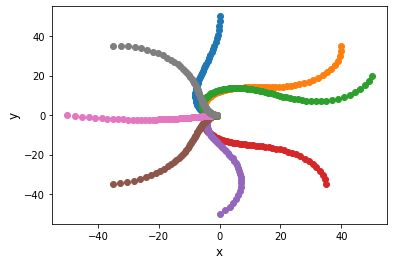

In [ ]:
# Test: The destination point is in the middle and the starting points are different
controller(0, 50, 0, 0, -90, 2.5, 20, [], [])
controller(40, 35, 0, 0, -90, 2.5, 20, [], [])
controller(50, 20, 0, 0, -110, 2.5, 20, [], [])
controller(35, -35, 0, 0, 100, 2.5, 20, [], [])
controller(0, -50, 0, 0, 45, 2.5, 20, [], [])
controller(-35, -35, 0, 0, 10, 2.5, 20, [], [])
controller(-50, 0, 0, 0, -10, 2.5, 20, [], [])
controller(-35, 35, 0, 0, 0, 2.5, 20, [], [])

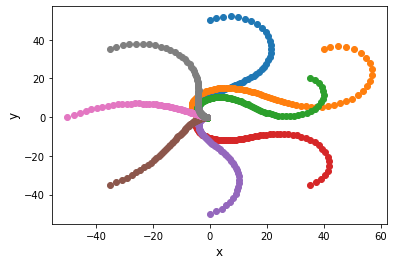

In [ ]:
# another inputs
controller(0, 50, 0, 0, 30, 2.5, 20, [], [])
controller(40, 35, 0, 0, 30, 2.5, 20, [], [])
controller(35, 20, 0, 0, -30, 2.5, 20, [], [])
controller(35, -35, 0, 0, 30, 2.5, 20, [], [])
controller(0, -50, 0, 0, 30, 2.5, 20, [], [])
controller(-35, -35, 0, 0, 30, 2.5, 20, [], [])
controller(-50, 0, 0, 0, 30, 2.5, 20, [], [])
controller(-35, 35, 0, 0, 30, 2.5, 20, [], [])